In [396]:
import networkx as nx
from matplotlib import pyplot as plt
import random
from functools import reduce

**Опис алгоритму генерації дороги**<br>
Для генерації графу-дороги було створено функцію `setup_road`, яка в якості параметрів приймає `m` - кількість перехресть по вертикалі, `n` - кількість перехресть по горизонталі та `n_edges_to_remove` - кількість випадкових ребер графу, які потрібно видалити з дороги.

За допомогою бібліотеки `networkx` створюється інстанс графу `G` у вигляді квадратної сітки. У циклі `while` зі списку всіх доступних до видалення ребер графу `available_edges` обирається випадкове ребро `selected_edge` та видаляється з нього, після чого виконується перевірка чи залишився граф повністю зв'язним. У випадку якщо граф перестав бути з'язним видалене ребро додається назад до графу, в іншому випадку відбувається перехід до наступної ітерації. У кінці кожної ітерації випадково обране ребро видаляється зі списку `available_edges`, оскільки воно, або вже було видалене з графу, або після його видалення граф стане незв'язним. Цикл буде виконуватись поки не буде видалено `n_edges_to_remove` ребер та кількість видалених ребер буде не більша ніж максимально можлива `max_edges_to_remove` (вираховується як `E - N + 1`, де `E` - кількість ребер графу та `N` - кількість вершин).

In [397]:
def setup_road(n_edges_to_remove, m = 5, n = 5):
  G = nx.grid_2d_graph(m, n)

  available_edges = list(G.edges)

  max_edges_to_remove = len(list(G.edges)) - len(list(G.nodes)) + 1

  i = 0

  while i < n_edges_to_remove and i < max_edges_to_remove:
    selected_edge = random.choice(available_edges)
    G.remove_edge(*selected_edge)

    if not nx.is_connected(G):
      G.add_edge(*selected_edge)
    else:
      i += 1

    available_edges.remove(selected_edge)

  return G

In [398]:
def draw_road(G):
  plt.figure(figsize=(5,5))

  pos = {(x,y):(y,-x) for x,y in G.nodes()}

  plt_options = {
    "node_size": 200,
    "node_color": "white",
    "edgecolors": "black",
    "with_labels": True
  }

  nx.draw(G, pos=pos, **plt_options)

In [399]:
class Agent:
  def drive(self, road, departure_point, destination_point):
    visited = {}

    stack = []

    stack.append((departure_point, None))

    while len(stack):
      current_point, parent_point = stack.pop()
      visited[current_point] = parent_point

      if current_point == destination_point:
        path = [destination_point]
        current = visited[destination_point]

        while current != departure_point:
          path.insert(0, current)
          current = visited[current]
        
        path.insert(0, departure_point)

        return path

      neighbors = road.neighbors(current_point)
      
      for neighbor in neighbors:
        if neighbor not in visited:
          stack.append((neighbor, current_point))

    

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4)]


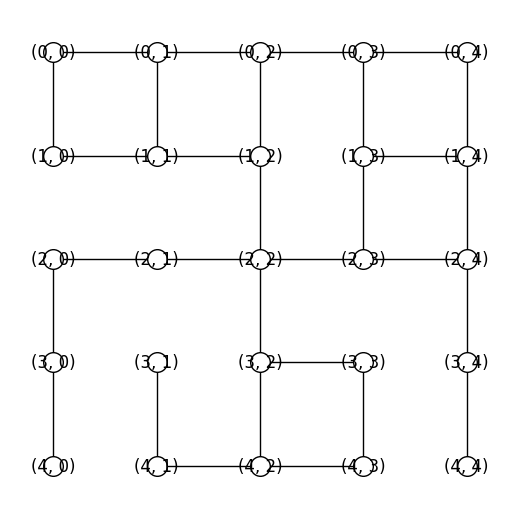

In [400]:
road = setup_road(n_edges_to_remove=10)
draw_road(road)
agent = Agent()
print(agent.drive(road, (0, 0), (4, 4)))